# DATA MANUPILATION

In [ ]:
hazard_type = {'Unsafe_Condition' :	0,
'Unsafe_Behavior':	1,
'NM':	2,
'FA':	3
}
hazard_kind ={ 
'Absence(Improper) of safety device.':0,
'breaching procedures.':1,
'FA - Without PSIF':2,
'Failure to communicate':3,
'Falling objects':4,
'Fire hazard':5,
'Improper bonding':6,
'Improper Cylinders':7,
'Improper design.':8,
'Improper Ergonomics.':9,
'Improper Tools/Equip.':10,
'Improper work environment.':11,
'Improper/missing of barricading / guarding':12,
'Lack of commitment.':13,
'Lack of inspection.':14,
'Lack of maintenance.':15,
'Lack of resources.':16,
'Lighting':17,
'LOTOTO':18,
'NM - With PSIF':19,
'NM - Without PSIF':20,
'Not wearing PPE.':21,
'Oil Leakage':22,
'Poor housekeeping.':23,
'Unnecessary scaf.':24,
'Unsafe storage':25
}
Eelect_kind = {
    'light': 0 , 
    'motor' : 1 , 
    'transformer': 2 , 
    'generator' : 3 , 
    'electrical room': 4 , 
    'earthing' : 5 ,
    'Cable' :  6 ,
    'panel' :7 ,
    'elevator' :8 ,
    'sensor' :9, 
    'hvac' : 10}
hazard_level = {'low':0 , 'medium' :1,'high':2}


In [6]:
# reading csv
import pandas as pd
import io
file_name ='observations_base_data.xlsx'  #electrical_data
# Load the uploaded CSV file
try:
    # Attempt to read with potential header issues handled
    # The snippet suggests no header, just lines of text.
    df = pd.read_excel(file_name,sheet_name='sheet1')
    
    display(df.head(3))
except Exception as e:
    # Fallback for encoding issues
    try:
        df = pd.read_csv(file_name, header=None, names=['text'], encoding='utf-8-sig', on_bad_lines='skip')
    except:
        # Last resort fallback
        df = pd.read_csv(file_name, header=None, names=['text'], encoding='latin1', on_bad_lines='skip')


ParserError: Error tokenizing data. C error: Buffer overflow caught - possible malformed input file.


In [6]:
# reading csv
import pandas as pd
import io
file_name ='observations_all_labeled_data.csv'  #electrical_data
# Load the uploaded CSV file
try:
    # Attempt to read with potential header issues handled
    # The snippet suggests no header, just lines of text.
    df = pd.read_csv(file_name, header=None, names=['text','type','hazard_kind','level','line','area','actionOrCorrectiveAction','respDepartment'], encoding='utf-8', on_bad_lines='skip')
    
    display(df.head(3))
except Exception as e:
    # Fallback for encoding issues
    try:
        df = pd.read_csv(file_name, header=None, names=['text'], encoding='utf-8-sig', on_bad_lines='skip')
    except:
        # Last resort fallback
        df = pd.read_csv(file_name, header=None, names=['text'], encoding='latin1', on_bad_lines='skip')


,text,type,hazard_kind,level,line,area,actionOrCorrectiveAction,respDepartment
0,text,type,hazard_kind,level,line,area,actionOrCorrectiveAction,respDepartment
1,labor from global tripped and feels pain in hi...,FA,FA - Without PSIF,Medium,1,Preheater/Kiln,He got first aid,Mechanical.
2,Slag truck related to Malena turned over in th...,NM,NM - With PSIF,Medium,1&2,Pre blending area,repair the truck,Production.


In [9]:
import pandas as pd
import re

# 1. Define the Granular Keyword Mapping
# This dictionary maps specific labels to their English and Arabic keywords
label_config = {
    # ELECTRICAL SUB-LABELS
    'electrical-cable': (['cable', 'wire'], ['كابل', 'سلك', 'كبلات', 'اسلاك']),
    'electrical-panel': (['panel', 'db', 'mcc', 'enclosure'], ['لوحة', 'لوحه', 'بارات']),
    'electrical-lighting': (['light', 'lamp', 'fixture', 'bulb'], ['كشاف', 'إضاءة', 'اضاءة', 'فانوس']),
    'electrical-grounding': (['earth', 'grounding'], ['تأريض', 'ارضي']),

    # MECHANICAL SUB-LABELS
    'mechanical-motor': (['motor', 'engine'], ['محرك', 'موتور']),
    'mechanical-gearbox': (['gearbox', 'gear box'], ['جيربوكس', 'تروس']),
    'mechanical-pump': (['pump'], ['طلمبة', 'مضخة', 'طرمبة']),
    'mechanical-bearing': (['bearing'], ['رولمان', 'بلي']),
    'mechanical-belt': (['belt'], ['سير']),
    'mechanical-piping': (['pipe', 'line', 'manifold'], ['ماسورة', 'مواسير', 'خط']),
    'mechanical-leakage': (['leak', 'oil leak'], ['تسريب', 'رشح', 'تنقيط']),

    # PRODUCTION SUB-LABELS
    'production-crusher': (['crusher'], ['كسارة', 'كساره']),
    'production-mill': (['mill'], ['طاحونة', 'طاحونه']),
    'production-blockage': (['blockage', 'jam', 'clog'], ['انسداد', 'تحجير']),
    'production-conveyor': (['conveyor'], ['ناقل']),
    'production-silo': (['silo', 'bin', 'hopper'], ['صومعة', 'سيلو', 'هوبر']),
}

def get_granular_label(text):
    if pd.isna(text):
        return "other-general"
    
    text = str(text).lower()
    
    for label, (en_keywords, ar_keywords) in label_config.items():
        # Check English words using \b to ensure whole word matching
        for word in en_keywords:
            if re.search(r'\b' + word + r'\b', text):
                return label
        # Check Arabic words (partial matching is usually safer for Arabic)
        for word in ar_keywords:
            if word in text:
                return label
                
    return "other-general"

# 3. Apply the Labeling
df['sub_issue'] = df['text'].apply(get_granular_label)

# 4. Optional: Combine with Observation Type (e.g., Unsafe Condition)
type_map = {
    'Unsafe_Condition': 'unsafe-condition',
    'Unsafe_Behavior': 'unsafe-action',
    'FA': 'first-aid', 'NM': 'near-miss',
    'MTC': 'medical-treatment', 'LTI': 'lost-time-injury'
}

df['final_label'] = df.apply(
    lambda row: f"{type_map.get(row['type'], 'other')} - {row['sub_issue']}", 
    axis=1
)

# 5. Save the results
df.to_csv('granular_labeled_observations.csv', index=False)
print(df[['text', 'final_label']].head())

                                                text  \
0                                               text   
1  labor from global tripped and feels pain in hi...   
2  Slag truck related to Malena turned over in th...   
3  Person related to Egy-maint hit his hand throu...   
4  خروج دخنة من لودر البنكر الخارجي للكلنكر اثناء...   

                 final_label  
0      other - other-general  
1  first-aid - other-general  
2  near-miss - other-general  
3  first-aid - other-general  
4  near-miss - other-general  


In [ ]:
# Labeling data


# Define keywords for each label (English and Arabic) based on the user's list and common synonyms
keywords = {
    0: ['light', 'lamp', 'illumination', 'fixture', 'bulb', 'lux', 'كشاف', 'انارة', 'إنارة', 'إضاءة', 'اضاءة', 'لمبة', 'لمبات', 'نور'],
    1: ['motor', 'engine', 'موتور', 'ماتور', 'محرك'],
    2: ['transformer', 'محول', 'ترانس'],
    3: ['generator', 'مولد'],
    4: ['electrical room', 'electric room','substation', 'switchgear', 'غرفة كهرباء', 'غرفه كهرباء', 'حجرة كهرباء', 'محطة'],
    5: ['earthing', 'earth', 'ground', 'ارضي', 'أرضي', 'تأريض', 'ارس'],
    6: ['cable', 'wire', 'cord', 'wiring', 'كابل', 'كبل', 'سلك', 'وير', 'وصلة', 'وصله'],
    7: ['panel', 'board', 'box', 'breaker', 'لوحة', 'لوحه', 'علبة', 'علبه', 'قاطع', 'تابلوه', 'كبينه', 'كابينة', 'بواط' , 'سوكت', 'بلجة'],
    9: ['sensor', 'switch', 'detector', 'حساس', 'سينسور', 'مفتاح', 'limit', 'limt', 'valve', 'valv' , 'برشر' , 'ثرمو كابل']
}

def get_label(text):
    if not isinstance(text, str):
        return -1
    text_lower = text.lower()
    
    found_labels = []
    # Check all keywords
    for label, keys in keywords.items():
        for k in keys:
            if k in text_lower:
                found_labels.append(label)
                break 
    
    if not found_labels:
        return -1
    
    # Priority Strategy:
    # If multiple found, we need a tie-breaker. 
    # The user provided list is 0-9. 
    # Common overlaps: "Motor Cable" (1 vs 6), "Panel Switch" (7 vs 9), "Substation Room" (8 vs 4).
    # "Motor Cable" -> Hazard is usually the cable. Cable (6).
    # "Panel Switch" -> Hazard is switch. Sensor/Switch (9).
    # "Electrical Room Light" -> Hazard is Light. Lighting (0).
    
    # Simple strategy: prioritize component over location, and specific over general.
    # 0 (Lighting), 9 (Sensor), 6 (Cable), 7 (Panel), 1 (Motor), 2 (Transformer), 3 (Generator), 5 (Earthing), 4 (Room), 8 (Station).
    # Let's try to sort found_labels by this priority? 
    # Or just use the first found in the loop (which is 0-9).
    # Let's stick to 0-9 order for consistency unless obvious. 
    # Returning the first one found in the 0-9 iteration.
    return found_labels[0]

# Apply labeling
df['label'] = df['text'].apply(get_label)

# Save the labeled file
df.to_csv('labeled_kinOfHazard.csv', index=False)
print(f"Labeled {len(df)} rows. Distribution:\n{df['label'].value_counts()}")

In [ ]:
# 2. Run the conversion
#!tensorflowjs_converter --input_format=keras maintenance_model.h5 web_model
!tensorflowjs_converter --input_format=keras "C:\Users\walid\.vscode\titan_management\ai\maintenance_model.h5" web_model
# 3. Zip the result so you can download it
!zip -r web_model.zip web_model

In [ ]:
# multi label 

import pandas as pd
import io

# Load the uploaded text file
# Using 'observations.txt'
try:
    with open('observations.txt', 'r', encoding='utf-8') as f:
        lines = f.readlines()
except Exception:
    # Fallback for encoding
    with open('observations.txt', 'r', encoding='latin1') as f:
        lines = f.readlines()

# Create DataFrame
df = pd.DataFrame(lines, columns=['text'])
df['text'] = df['text'].str.strip()
df = df[df['text'] != ''] # Remove empty lines

# Define keywords for each label (English and Arabic)
# Based on user request:
# 0: Lighting, 1: Motor, 2: Transformer, 3: Generator, 4: Elec Room, 
# 5: Earthing, 6: Cable, 7: Panel, 8: Substation, 9: Sensor
keywords = {
    0: ['light', 'lamp', 'illumination', 'fixture', 'bulb', 'lux', 'كشاف', 'انارة', 'إنارة', 'إضاءة', 'اضاءة', 'لمبة', 'لمبات', 'نور' ,'كشفات' , 'لمبه' ,'اضاءه','الاضاءه' ,'اناره'],
    1: ['motor', 'engine', 'موتور', 'ماتور', 'محرك' , 'روزتة' ,'كفر مروحه'],
    2: ['transformer', 'محول', 'ترانس'],
    3: ['generator', 'مولد'],
    4: ['electrical room', 'electric room', 'switchgear', 'غرفة كهرباء', 'غرفه كهرباء', 'حجرة كهرباء', 'substation','محطة'],
    5: ['earthing', 'earth', 'ground', 'ارضي', 'أرضي', 'تأريض', 'ارس'],
    6: ['cable', 'wire', 'cord', 'wiring', 'كابل', 'كبل', 'سلك', 'وير', 'وصلة', 'وصله'],
    7: ['panel', 'board', 'box', 'breaker', 'لوحة', 'لوحه', 'علبة', 'علبه', 'قاطع', 'تابلوه', 'كبينه', 'كابينة', 'بواط',  'VCS' , 'بانل'],
    8: ['ELevator', 'اسانسير', 'محطه'],
    9: ['sensor', 'switch', 'detector', 'حساس', 'سينسور', 'مفتاح', 'limit', 'limt', 'valve', 'روبسوتش', 'ثرمومتر' , 'ليفل' , 'برشر' , 'بالرادار' , 'الرادار'],
    10: ['HVAC' , 'مروحة' , 'تكييف' ],
}

def get_label(text):
    if not isinstance(text, str):
        return -1
    text_lower = text.lower()
    
    found_labels = []
    # Check all keywords
    for label, keys in keywords.items():
        for k in keys:
            if k in text_lower:
                found_labels.append(label)
                break 
    
    if not found_labels:
        return -1 # Unlabeled
    
    # Priority Strategy: Return the first one found in the 0-9 iteration order
    # This aligns with the user's provided list order.
    return found_labels[0]

# Apply labeling
df['label'] = df['text'].apply(get_label)

# Filter out unlabeled rows (optional, but requested "label list")
# Let's keep them but maybe sort so unlabeled are at the end? 
# No, let's just output the file.

# Save the labeled file
df.to_csv('labeled_observations.csv', index=False)
print(f"Labeled {len(df)} rows. Distribution:\n{df['label'].value_counts()}")

In [ ]:
# generate the multi output model
import pandas as pd
import numpy as np
import tensorflow as tf
import json
import os
from sklearn.utils import class_weight
from tensorflow.keras import layers, Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# --- 1. CONFIGURATION ---
VOCAB_SIZE = 10000
MAX_LEN = 120
EMBEDDING_DIM = 100

# --- 2. LOAD & CLEAN DATA ---
print("Loading data...")
df = pd.read_csv('observations_labeled_data.csv')

# 2.1 FIX COLUMN NAMES & TYPOS
if 'light' in df.columns: df.rename(columns={'light': 'electrical_kind'}, inplace=True)

df['text'] = df['text'].astype(str).str.strip()
if 'level' in df.columns:
    df['level'] = df['level'].astype(str).str.lower().str.strip()
if 'electrical_kind' in df.columns:
    df['electrical_kind'] = df['electrical_kind'].astype(str).str.strip()
    df.loc[df['electrical_kind'] == 'cable', 'electrical_kind'] = 'Cable'

# --- 3. MAPPINGS (REMOVED TYPE) ---
HAZARD_KIND_MAPPING = {
    'Absence(Improper) of safety device.': 0, 'breaching procedures.': 1, 'FA - Without PSIF': 2,
    'Failure to communicate': 3, 'Falling objects': 4, 'Fire hazard': 5, 'Improper bonding': 6,
    'Improper Cylinders': 7, 'Improper design.': 8, 'Improper Ergonomics.': 9, 'Improper Tools/Equip.': 10,
    'Improper work environment.': 11, 'Improper/missing of barricading / guarding': 12, 'Lack of commitment.': 13,
    'Lack of inspection.': 14, 'Lack of maintenance.': 15, 'Lack of resources.': 16, 'Lighting': 17,
    'LOTOTO': 18, 'NM - With PSIF': 19, 'NM - Without PSIF': 20, 'Not wearing PPE.': 21,
    'Oil Leakage': 22, 'Poor housekeeping.': 23, 'Unnecessary scaf.': 24, 'Unsafe storage': 25
}
ELEC_KIND_MAPPING = {
    'light': 0, 'motor': 1, 'transformer': 2, 'generator': 3, 'electrical room': 4,
    'earthing': 5, 'Cable': 6, 'panel': 7, 'elevator': 8, 'sensor': 9, 'hvac': 10
}
LEVEL_MAPPING = { 'low': 0, 'medium': 1, 'high': 2 }

# --- 4. FILL MISSING LABELS ---
def get_missing_labels(row):
    h = row['hazard_kind'] if row['hazard_kind'] in HAZARD_KIND_MAPPING else 'Lack of maintenance.'
    e = row['electrical_kind'] if row['electrical_kind'] in ELEC_KIND_MAPPING else 'panel'
    l = row['level'] if row['level'] in LEVEL_MAPPING else 'low'
    return pd.Series([h, e, l])

df[['hazard_kind', 'electrical_kind', 'level']] = df.apply(get_missing_labels, axis=1)

# --- 5. PREPARE INPUTS ---
def map_to_int(col, mapping):
    return df[col].map(mapping).fillna(0).astype(int).values

y_hazard = map_to_int('hazard_kind', HAZARD_KIND_MAPPING)
y_elec = map_to_int('electrical_kind', ELEC_KIND_MAPPING)
y_level = map_to_int('level', LEVEL_MAPPING)

tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token='<OOV>')
tokenizer.fit_on_texts(df['text'].astype(str))
X = pad_sequences(tokenizer.texts_to_sequences(df['text']), maxlen=MAX_LEN, padding='post', truncating='post')

# --- 6. CALCULATE SAMPLE WEIGHTS ---
def get_weights_dict(y_data):
    classes = np.unique(y_data)
    weights = class_weight.compute_class_weight('balanced', classes=classes, y=y_data)
    return dict(zip(classes, weights))

w_hazard = get_weights_dict(y_hazard)
w_elec = get_weights_dict(y_elec)
w_level = get_weights_dict(y_level)

def get_sample_weights(y_data, weight_dict):
    return np.array([weight_dict[y] for y in y_data])

sw_hazard = get_sample_weights(y_hazard, w_hazard)
sw_elec = get_sample_weights(y_elec, w_elec)
sw_level = get_sample_weights(y_level, w_level)

print("Sample weights calculated.")

# --- 7. MODEL DEFINITION (3 OUTPUTS) ---
input_text = layers.Input(shape=(MAX_LEN,), name='input_text')
x = layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM)(input_text)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=False))(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.3)(x) 

# Outputs (Only 3 now)
out_hazard = layers.Dense(len(HAZARD_KIND_MAPPING), activation='softmax', name='out_hazard')(x)
out_elec = layers.Dense(len(ELEC_KIND_MAPPING), activation='softmax', name='out_elec')(x)
out_level = layers.Dense(len(LEVEL_MAPPING), activation='softmax', name='out_level')(x)

model = Model(inputs=input_text, outputs=[out_hazard, out_elec, out_level])

# --- 8. COMPILE & TRAIN ---
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
    loss='sparse_categorical_crossentropy', 
    metrics={
        'out_hazard': 'accuracy',
        'out_elec': 'accuracy',
        'out_level': 'accuracy'
    }
)

print("Training...")
model.fit(
    X, 
    [y_hazard, y_elec, y_level], 
    sample_weight=[sw_hazard, sw_elec, sw_level], 
    epochs=30,  # Recommended: 30-50 epochs
    batch_size=32,
    verbose=1
)

# --- 9. EXPORT ---
print("Converting to TFLite...")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS,]
tflite_model = converter.convert()

with open('smart_issue_model.tflite', 'wb') as f:
    f.write(tflite_model)
    
# Save Vocab & Labels
with open('vocab.json', 'w', encoding='utf-8') as f:
    json.dump(tokenizer.word_index, f)

def save_labels(mapping, filename):
    sorted_labels = [k for k, v in sorted(mapping.items(), key=lambda item: item[1])]
    with open(filename, 'w', encoding='utf-8') as f:
        json.dump(sorted_labels, f)

save_labels(HAZARD_KIND_MAPPING, 'labels_hazard.json')
save_labels(ELEC_KIND_MAPPING, 'labels_elec.json')
save_labels(LEVEL_MAPPING, 'labels_level.json')

print("Done! Files generated.")

In [ ]:
# generate the labels and generating multi output classification model in one code

import pandas as pd
import numpy as np
import tensorflow as tf
import json
import os
from sklearn.utils import class_weight
from tensorflow.keras import layers, Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# --- 1. CONFIGURATION ---
# Note: Ensure MAX_LEN matches the value in your Canvas embedding script
VOCAB_SIZE = 10000
MAX_LEN = 120 
EMBEDDING_DIM = 100

# --- 2. LOAD & CLEAN DATA ---
print("Loading data...")
df = pd.read_csv('observations_labeled_data.csv')

# 2.1 FIX COLUMN NAMES & TYPOS
if 'light' in df.columns: df.rename(columns={'light': 'electrical_kind'}, inplace=True)

df['text'] = df['text'].astype(str).str.strip()
if 'level' in df.columns:
    df['level'] = df['level'].astype(str).str.lower().str.strip()
if 'electrical_kind' in df.columns:
    df['electrical_kind'] = df['electrical_kind'].astype(str).str.strip()
    df.loc[df['electrical_kind'] == 'cable', 'electrical_kind'] = 'Cable'

# --- 3. MAPPINGS ---
HAZARD_KIND_MAPPING = {
    'Absence(Improper) of safety device.': 0, 'breaching procedures.': 1, 'FA - Without PSIF': 2,
    'Failure to communicate': 3, 'Falling objects': 4, 'Fire hazard': 5, 'Improper bonding': 6,
    'Improper Cylinders': 7, 'Improper design.': 8, 'Improper Ergonomics.': 9, 'Improper Tools/Equip.': 10,
    'Improper work environment.': 11, 'Improper/missing of barricading / guarding': 12, 'Lack of commitment.': 13,
    'Lack of inspection.': 14, 'Lack of maintenance.': 15, 'Lack of resources.': 16, 'Lighting': 17,
    'LOTOTO': 18, 'NM - With PSIF': 19, 'NM - Without PSIF': 20, 'Not wearing PPE.': 21,
    'Oil Leakage': 22, 'Poor housekeeping.': 23, 'Unnecessary scaf.': 24, 'Unsafe storage': 25
}

ELEC_KIND_MAPPING = {
    'light': 0, 'motor': 1, 'transformer': 2, 'generator': 3, 'electrical room': 4,
    'earthing': 5, 'Cable': 6, 'panel': 7, 'elevator': 8, 'sensor': 9, 'hvac': 10
}

LEVEL_MAPPING = { 'low': 0, 'medium': 1, 'high': 2 }

# --- 4. FILL MISSING LABELS ---
def get_missing_labels(row):
    h = row['hazard_kind'] if row['hazard_kind'] in HAZARD_KIND_MAPPING else 'Lack of maintenance.'
    e = row['electrical_kind'] if row['electrical_kind'] in ELEC_KIND_MAPPING else 'panel'
    l = row['level'] if row['level'] in LEVEL_MAPPING else 'low'
    return pd.Series([h, e, l])

df[['hazard_kind', 'electrical_kind', 'level']] = df.apply(get_missing_labels, axis=1)

# --- 5. PREPARE INPUTS ---
def map_to_int(col, mapping):
    return df[col].map(mapping).fillna(0).astype(int).values

y_hazard = map_to_int('hazard_kind', HAZARD_KIND_MAPPING)
y_elec = map_to_int('electrical_kind', ELEC_KIND_MAPPING)
y_level = map_to_int('level', LEVEL_MAPPING)

tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token='<OOV>')
tokenizer.fit_on_texts(df['text'].astype(str))
X = pad_sequences(tokenizer.texts_to_sequences(df['text']), maxlen=MAX_LEN, padding='post', truncating='post')

# --- 6. CALCULATE SAMPLE WEIGHTS ---
def get_weights_dict(y_data):
    classes = np.unique(y_data)
    weights = class_weight.compute_class_weight('balanced', classes=classes, y=y_data)
    return dict(zip(classes, weights))

w_hazard = get_weights_dict(y_hazard)
w_elec = get_weights_dict(y_elec)
w_level = get_weights_dict(y_level)

def get_sample_weights(y_data, weight_dict):
    return np.array([weight_dict[y] for y in y_data])

sw_hazard = get_sample_weights(y_hazard, w_hazard)
sw_elec = get_sample_weights(y_elec, w_elec)
sw_level = get_sample_weights(y_level, w_level)

print("Sample weights calculated.")

# --- 7. MODEL DEFINITION (3 OUTPUTS) ---
input_text = layers.Input(shape=(MAX_LEN,), name='input_text')
x = layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM)(input_text)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=False))(x)

# CRITICAL: This layer is named 'embedding_output' so the Canvas script can extract it
x = layers.Dense(64, activation='relu', name='embedding_output')(x)
x = layers.Dropout(0.3)(x) 

# Outputs
out_hazard = layers.Dense(len(HAZARD_KIND_MAPPING), activation='softmax', name='out_hazard')(x)
out_elec = layers.Dense(len(ELEC_KIND_MAPPING), activation='softmax', name='out_elec')(x)
out_level = layers.Dense(len(LEVEL_MAPPING), activation='softmax', name='out_level')(x)

model = Model(inputs=input_text, outputs=[out_hazard, out_elec, out_level])

# --- 8. COMPILE & TRAIN ---
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
    loss='sparse_categorical_crossentropy', 
    metrics={
        'out_hazard': 'accuracy',
        'out_elec': 'accuracy',
        'out_level': 'accuracy'
    }
)

print("Training...")
model.fit(
    X,
    [y_hazard, y_elec, y_level], 
    sample_weight=[sw_hazard, sw_elec, sw_level], 
    epochs=30,
    batch_size=32,
    verbose=1
)

# --- 9. EXPORT & SAVE ---
# 9.1 Save the full Keras model for the Embedding script
print("Saving Keras model to 'safety_model.h5'...")
model.save('safety_model.h5')

# 9.2 Convert to TFLite for Flutter
print("Converting to TFLite...")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
tflite_model = converter.convert()

with open('safety_model.tflite', 'wb') as f:
    f.write(tflite_model)
    
# 9.3 Save Vocab & Labels
with open('vocab.json', 'w', encoding='utf-8') as f:
    json.dump(tokenizer.word_index, f)

def save_labels(mapping, filename):
    sorted_labels = [k for k, v in sorted(mapping.items(), key=lambda item: item[1])]
    with open(filename, 'w', encoding='utf-8') as f:
        json.dump(sorted_labels, f)

save_labels(HAZARD_KIND_MAPPING, 'labels_hazard.json')
save_labels(ELEC_KIND_MAPPING, 'labels_elec.json')
save_labels(LEVEL_MAPPING, 'labels_level.json')

print("Done! All files generated for Flutter and Analytics.")

In [2]:
# auto labeling detailed_kind
import pandas as pd
import numpy as np

# --- CONFIGURATION ---
INPUT_FILE = 'observations_all_labeled_data.csv'
OUTPUT_FILE = 'observations_all_labeled_data_updated.csv'

# --- KEYWORD DICTIONARY ---
# Format: 'Label': ['keyword1', 'keyword2', ...]
# The script checks these in order. Priority matters!
KEYWORDS = {
    # 'Lighting': [
    #     'light', 'dark', 'lux', 'lamp', 'bulb',
    #     'كشاف', 'إضاءة', 'انارة', 'لمبة', 'ظلام', 'نور'
    # ],
    # 'Cable': [
    #     'cable', 'wire', 'tray', 'joint', 'termination', 'gland', 'earthing', 'bonding',
    #     'كابل', 'سلك', 'واير', 'توصيل', 'ارضي', 'تأريض', 'ترميل', 'كبل'
    # ],
    # 'Panel_Box': [
    #     'panel', 'box', 'cabinet', 'junction', 'cover', 'door', 'mcc',
    #     'لوحة', 'غطاء', 'علبة', 'بواط', 'باب', 'كبينة'
    # ],
    # 'Motor': [
    #     'motor', 'pump', 'vibration', 'noise', 'bearing', 'fan',
    #     'موتور', 'طلمبة', 'اهتزاز', 'صوت', 'بيلي', 'مروحة'
    # ],
    # 'Sensor_Instrument': [
    #     'sensor', 'switch', 'gauge', 'thermo', 'transmitter', 'rope',
    #     'حساس', 'سويتش', 'مؤشر', 'حرارة', 'عداد'
    # ],
    'Guarding': [
        'guard', 'barricade', 'fence', 'cover', 'protection', 'shield',
        'حاجز', 'سور', 'تغطية', 'حماية', 'كفر'
    ],
    'Housekeeping': [
        'housekeeping', 'dust', 'trash', 'scrap', 'clean', 'waste', 'debris', 'material',
        'نظافة', 'مخلفات', 'تراكم', 'اتربة', 'قمامة', 'بواقي', 'رايش'
    ],
    'Leakage': [
        'leak', 'oil', 'water', 'air', 'spill',
        'تسريب', 'زيت', 'مياه', 'هواء', 'تسييل'
    ],
    'PPE': [
        'ppe', 'helmet', 'vest', 'shoe', 'glove', 'mask', 'safety',
        'مهمات', 'خوذة', 'فيست', 'حذاء', 'قفاز', 'كمامة'
    ],
    'Fire_Safety': [
        'fire', 'extinguisher', 'hose', 'alarm', 'smoke',
        'حريق', 'طفاية', 'خرطوم', 'انذار', 'دخان'
    ],
    'Conveyor': [
        'conveyor', 'belt', 'roller', 'idler', 'pulley',
        'سير', 'قشاط', 'رول', 'بكرة'
    ]
}

def auto_label(row):
    # --- SKIP LOGIC: If already labeled, keep it ---
    val = row['detailed_kind']
    
    # Check if value is NOT NaN and NOT an empty string
    if pd.notna(val):
        str_val = str(val).strip()
        if str_val and str_val.lower() not in ['nan', 'null', 'none']:
            return str_val
            
    # --- IF EMPTY, RUN KEYWORD MATCHING ---
    text = str(row['text']).lower()
    
    # Check keywords
    for label, words in KEYWORDS.items():
        for word in words:
            if word.lower() in text:
                return label
                
    return 'General' # Fallback if no keywords match

# --- MAIN EXECUTION ---
print(f"📂 Loading {INPUT_FILE}...")
try:
    df = pd.read_csv(INPUT_FILE)
except Exception as e:
    # Try different encoding if default fails
    print(f"⚠️ Standard load failed: {e}. Trying 'latin1'...")
    df = pd.read_csv(INPUT_FILE, encoding='latin1')

# Ensure column exists
if 'detailed_kind' not in df.columns:
    df['detailed_kind'] = np.nan

print("🏷️  Auto-labeling missing rows (Skipping existing data)...")
original_missing = df['detailed_kind'].isna().sum() + (df['detailed_kind'] == '').sum()

df['detailed_kind'] = df.apply(auto_label, axis=1)

new_missing = (df['detailed_kind'] == 'General').sum()
print(f"✅ Finished!")
print(f"   - Rows processed: {len(df)}")
print(f"   - Previously unlabeled: {original_missing}")
print(f"   - Auto-labeled categories: {df['detailed_kind'].value_counts().to_dict()}")

print(f"💾 Saving to {OUTPUT_FILE}...")
df.to_csv(OUTPUT_FILE, index=False, encoding='utf-8-sig') # utf-8-sig for Excel Arabic support
print("🚀 Done.")

📂 Loading observations_all_labeled_data.csv...
🏷️  Auto-labeling missing rows (Skipping existing data)...
✅ Finished!
   - Rows processed: 15714
   - Previously unlabeled: 13363
   - Auto-labeled categories: {'General': 6786, 'Leakage': 2104, 'Guarding': 1750, 'Conveyor': 1538, 'Housekeeping': 859, 'cable': 645, 'light': 585, 'panel': 422, 'motor': 347, 'Fire_Safety': 205, 'PPE': 121, 'sensor': 117, 'hvac': 74, 'electrical room': 63, 'elevator': 51, '#VALUE!': 42, 'transformer': 5}
💾 Saving to observations_all_labeled_data_updated.csv...
🚀 Done.


# TEXT CLASSIFIER & EMBEDDING

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import json
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, Model, callbacks
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.utils import class_weight

# --- 1. CONFIGURATION ---
VOCAB_SIZE = 10000
MAX_LEN = 120
EMBEDDING_DIM = 256 
INPUT_FILE = 'observations_all_labeled_data.csv'
CHART_FILE = 'training_performance_charts.png'

# --- 2. DATA LOADING & CLEANING ---
print("📂 Loading and Cleaning Data...")
if not os.path.exists(INPUT_FILE):
    raise FileNotFoundError(f"Input file {INPUT_FILE} not found.")

df = pd.read_csv(INPUT_FILE).fillna('General')

def clean_and_inject(row):
    line = str(row['line']).lower().replace('nan', '').replace('_', ' ').strip()
    area = str(row['area']).lower().replace('nan', '').replace('_', ' ').strip()
    text = str(row['text']).lower().replace('nan', '').strip()
    return " ".join([p for p in [line, area, text] if p])

df['combined_text'] = df.apply(clean_and_inject, axis=1)

# --- 3. STRICT MAPPING LOGIC ---
def get_strict_map(df, col):
    unique_labels = sorted([str(x).strip() for x in df[col].unique()])
    return {label: i for i, label in enumerate(unique_labels)}

MAPS = {
    'type': {'Unsafe_Condition': 0, 'Unsafe_Behavior': 1, 'NM': 2, 'FA': 3},
    'level': {'low': 0, 'medium': 1, 'high': 2},
    'hazard': get_strict_map(df, 'hazard_kind'),
    'detailed': get_strict_map(df, 'detailed_kind'),
    'action': get_strict_map(df, 'actionOrCorrectiveAction'),
    'dept': get_strict_map(df, 'respDepartment')
}

# Prepare Target Arrays
y_type = df['type'].map(MAPS['type']).fillna(0).astype(int).values
y_hazard = df['hazard_kind'].map(MAPS['hazard']).fillna(0).astype(int).values
y_detailed = df['detailed_kind'].map(MAPS['detailed']).fillna(0).astype(int).values
y_level = df['level'].str.lower().map(MAPS['level']).fillna(0).astype(int).values
y_action = df['actionOrCorrectiveAction'].map(MAPS['action']).fillna(0).astype(int).values
y_dept = df['respDepartment'].map(MAPS['dept']).fillna(0).astype(int).values

# --- 4. TOKENIZATION ---
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token='<OOV>')
tokenizer.fit_on_texts(df['combined_text'])
X_all = pad_sequences(tokenizer.texts_to_sequences(df['combined_text']), maxlen=MAX_LEN, padding='post')

# --- 5. TRAIN / TEST SPLIT ---
print("✂️ Splitting Data (80% Train / 20% Test)...")
indices = np.arange(len(df))
train_idx, test_idx = train_test_split(indices, test_size=0.2, random_state=42)

X_train = X_all[train_idx]
X_test = X_all[test_idx]

def split_y(y_data):
    return y_data[train_idx], y_data[test_idx]

y_type_tr, y_type_te = split_y(y_type)
y_hazard_tr, y_hazard_te = split_y(y_hazard)
y_detailed_tr, y_detailed_te = split_y(y_detailed)
y_level_tr, y_level_te = split_y(y_level)
y_action_tr, y_action_te = split_y(y_action)
y_dept_tr, y_dept_te = split_y(y_dept)

# --- 6. SAMPLE WEIGHTING ---
def get_sample_weights(y_data):
    weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_data), y=y_data)
    w_dict = {i: w for i, w in zip(np.unique(y_data), weights)}
    return np.array([w_dict.get(val, 1.0) for val in y_data])

# We use a LIST of weights matching the order of outputs to avoid KeyErrors
train_weights_list = [
    np.ones(len(y_type_tr)),                     # out_type
    get_sample_weights(y_hazard_tr),             # out_hazard
    get_sample_weights(y_detailed_tr) * 3.0,     # out_detailed  # Increase this to 3.0 or 4.0
    np.ones(len(y_level_tr)),                    # out_level
    np.ones(len(y_action_tr)),                   # out_action
    get_sample_weights(y_dept_tr) * 1.5          # out_dept
]

# --- 7. CNN ARCHITECTURE ---
inputs = layers.Input(shape=(MAX_LEN,), name='input_text')
embedding = layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM)(inputs)
embedding = layers.SpatialDropout1D(0.3)(embedding)

# Branch 1
conv3 = layers.Conv1D(128, 3, padding='same')(embedding)
conv3 = layers.BatchNormalization()(conv3)
conv3 = layers.Activation('relu')(conv3)
pool3 = layers.GlobalMaxPooling1D()(conv3)

# Branch 2
conv5 = layers.Conv1D(128, 5, padding='same')(embedding)
conv5 = layers.BatchNormalization()(conv5)
conv5 = layers.Activation('relu')(conv5)
pool5 = layers.GlobalMaxPooling1D()(conv5)

merged = layers.Concatenate()([pool3, pool5])

# Shared Reasoning
x = layers.Dense(512)(merged)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.Dropout(0.4)(x)

# Embedding Vector
emb_vec = layers.Dense(128, activation='relu', name='embedding_vector')(x)

# 6 Output Heads
out_type = layers.Dense(len(MAPS['type']), activation='softmax', name='out_type')(emb_vec)
out_hazard = layers.Dense(len(MAPS['hazard']), activation='softmax', name='out_hazard')(emb_vec)
out_detailed = layers.Dense(len(MAPS['detailed']), activation='softmax', name='out_detailed')(emb_vec)
out_level = layers.Dense(len(MAPS['level']), activation='softmax', name='out_level')(emb_vec)
out_action = layers.Dense(len(MAPS['action']), activation='softmax', name='out_action')(emb_vec)
out_dept = layers.Dense(len(MAPS['dept']), activation='softmax', name='out_dept')(emb_vec)

model = Model(inputs=inputs, outputs=[out_type, out_hazard, out_detailed, out_level, out_action, out_dept])

# FIXED: Passed metrics as a list of 6 items
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'] * 6 
)

# --- 8. TRAINING ---
print("🚀 Training High-Performance CNN...")

early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_schedule = callbacks.ReduceLROnPlateau(monitor='loss', factor=0.5, patience=2)

# Pack targets into lists to avoid dictionary mapping issues
y_train_list = [y_type_tr, y_hazard_tr, y_detailed_tr, y_level_tr, y_action_tr, y_dept_tr]
y_test_list = [y_type_te, y_hazard_te, y_detailed_te, y_level_te, y_action_te, y_dept_te]

history = model.fit(
    X_train, 
    y_train_list, 
    validation_data=(X_test, y_test_list),
    sample_weight=train_weights_list,
    epochs=60, 
    batch_size=32,
    callbacks=[lr_schedule, early_stop],
    verbose=1
)

# --- 9. CHARTING ---
print("📊 Generating Performance Charts...")
def plot_history(history, filename):
    # Metrics names automatically generated by Keras for list outputs usually follow: 
    # out_type_accuracy, out_hazard_accuracy, etc.
    metrics = ['out_type_accuracy', 'out_hazard_accuracy', 'out_detailed_accuracy', 
               'out_level_accuracy', 'out_action_accuracy', 'out_dept_accuracy']
    titles = ['Type', 'Hazard', 'Detailed', 'Level', 'Action', 'Department']
    
    plt.figure(figsize=(18, 10))
    for i, metric in enumerate(metrics):
        if metric not in history.history:
            print(f"⚠️ Warning: Metric {metric} not found in history keys: {history.history.keys()}")
            continue
            
        plt.subplot(2, 3, i + 1)
        plt.plot(history.history[metric], label='Train Acc')
        plt.plot(history.history['val_' + metric], label='Test Acc', linestyle='--')
        plt.title(f'{titles[i]} Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(filename)
    print(f"✅ Charts saved to {filename}")
    plt.show()

plot_history(history, CHART_FILE)

# --- 10. EXPORT ---
print("💾 Exporting Classifier TFLite...")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.target_spec.supported_ops = [
  tf.lite.OpsSet.TFLITE_BUILTINS, 
  tf.lite.OpsSet.SELECT_TF_OPS 
]
with open('safety_classifier_model.tflite', 'wb') as f:
    f.write(converter.convert())

print("💾 Exporting Embedding TFLite...")
emb_model = Model(inputs=inputs, outputs=model.get_layer('embedding_vector').output)
converter_emb = tf.lite.TFLiteConverter.from_keras_model(emb_model)
with open('safety_embedding_model.tflite', 'wb') as f:
    f.write(converter_emb.convert())

# --- 11. ASSETS ---
def save_labels(mapping, filename):
    labels = [k for k, v in sorted(mapping.items(), key=lambda item: item[1])]
    with open(filename, 'w', encoding='utf-8') as f:
        json.dump(labels, f, ensure_ascii=False)

print("💾 Saving Assets...")
with open('vocab.json', 'w', encoding='utf-8') as f:
    json.dump(tokenizer.word_index, f, ensure_ascii=False)

save_labels(MAPS['type'], 'labels_type.json')
save_labels(MAPS['hazard'], 'labels_hazard.json')
save_labels(MAPS['detailed'], 'labels_detailed_kind.json')
save_labels(MAPS['level'], 'labels_level.json')
save_labels(MAPS['action'], 'labels_action.json')
save_labels(MAPS['dept'], 'labels_dept.json')

print("✅ DONE! Models, Charts, and Assets Ready.")

📂 Loading and Cleaning Data...
Epoch 1/60
395/395 ━━━━━━━━━━━━━━━━━━━━ 73s 143ms/step - loss: 15.0476 - out_action_accuracy: 0.7413 - out_action_loss: 0.8085 - out_dept_accuracy: 0.1683 - out_dept_loss: 3.7801 - out_detailed_accuracy: 0.1276 - out_detailed_loss: 5.8600 - out_hazard_accuracy: 0.0983 - out_hazard_loss: 3.8425 - out_level_accuracy: 0.7187 - out_level_loss: 0.5806 - out_type_accuracy: 0.9713 - out_type_loss: 0.1519 - val_loss: 8.1117 - val_out_action_accuracy: 0.8493 - val_out_action_loss: 0.5374 - val_out_dept_accuracy: 0.2363 - val_out_dept_loss: 1.8347 - val_out_detailed_accuracy: 0.1722 - val_out_detailed_loss: 2.3284 - val_out_hazard_accuracy: 0.1963 - val_out_hazard_loss: 2.9398 - val_out_level_accuracy: 0.8776 - val_out_level_loss: 0.3389 - val_out_type_accuracy: 0.9727 - val_out_type_loss: 0.1274
Epoch 2/60
395/395 ━━━━━━━━━━━━━━━━━━━━ 67s 169ms/step - loss: 11.3922 - out_action_accuracy: 0.8764 - out_action_loss: 0.4000 - out_dept_accuracy: 0.3676 - out_dept_loss:

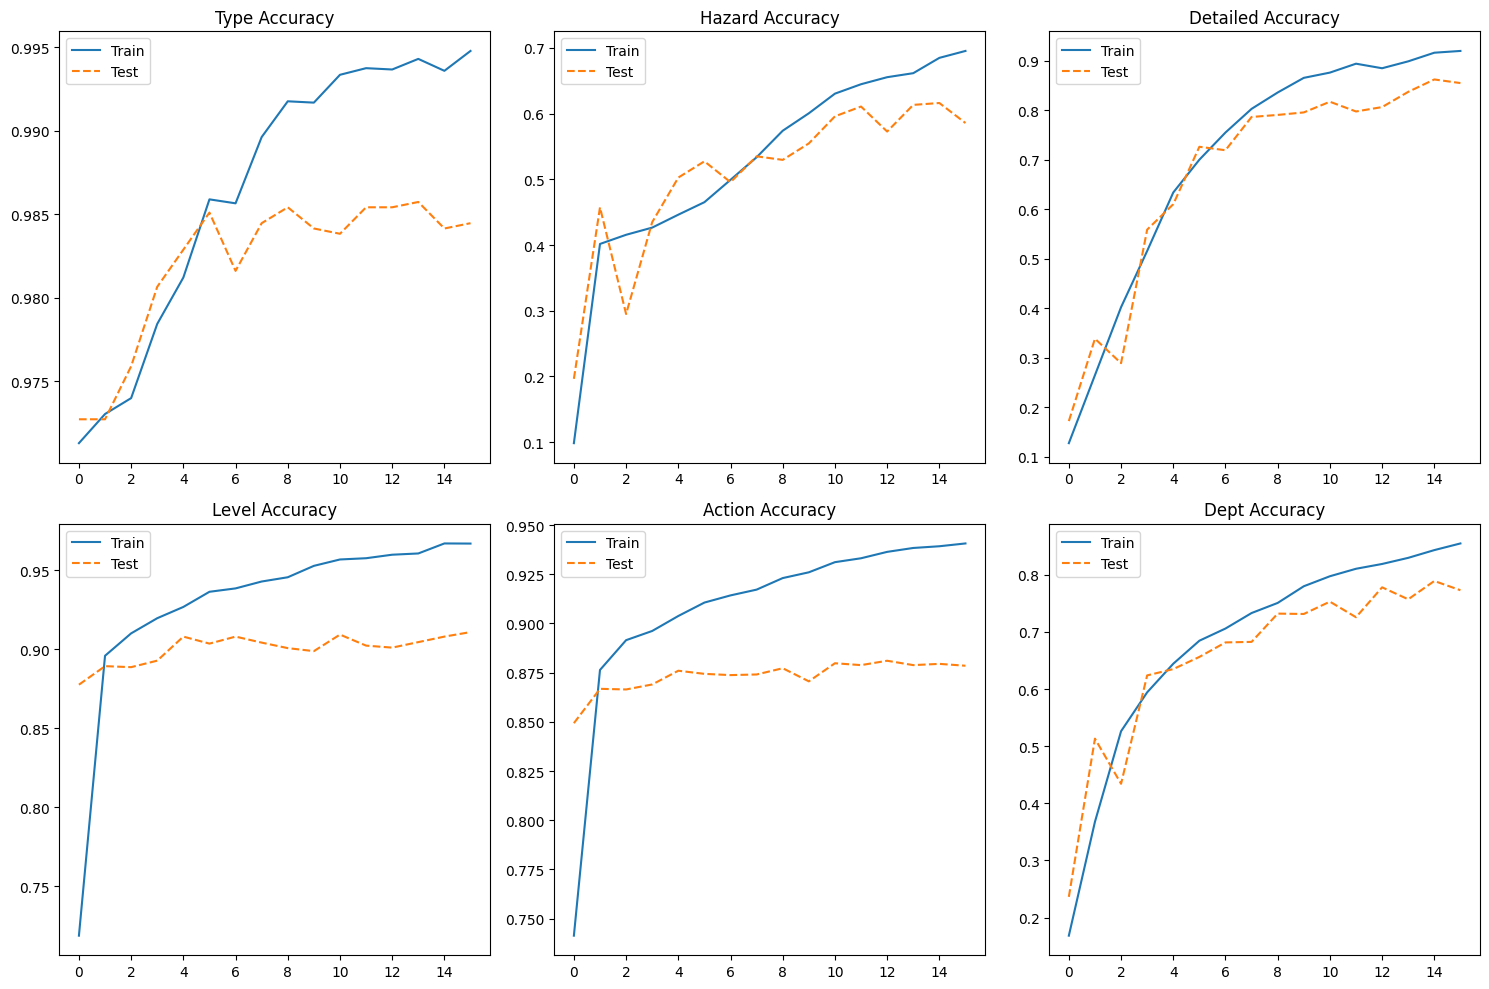

In [20]:
# FINAL WEB OPTIMIZED VERSION
import pandas as pd
import numpy as np
import tensorflow as tf
import json
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, Model, callbacks
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.utils import class_weight

# --- 1. CONFIGURATION ---
VOCAB_SIZE = 10000
MAX_LEN = 120
EMBEDDING_DIM = 128 
INPUT_FILE = 'observations_all_labeled_data.csv'
CHART_FILE = 'training_performance_charts.png'

# --- 2. DATA LOADING & CLEANING ---
print("📂 Loading and Cleaning Data...")
df = pd.read_csv(INPUT_FILE).fillna('General')

def clean_and_inject(row):
    line = str(row['line']).lower().replace('nan', '').replace('_', ' ').strip()
    area = str(row['area']).lower().replace('nan', '').replace('_', ' ').strip()
    observation = str(row['text']).lower().replace('nan', '').strip()
    return " ".join([p for p in [line, area, observation] if p])

df['combined_text'] = df.apply(clean_and_inject, axis=1)

# --- 3. MAPPING LOGIC ---
def get_strict_map(df, col):
    unique_labels = sorted([str(x).strip() for x in df[col].unique()])
    return {label: i for i, label in enumerate(unique_labels)}

MAPS = {
    'type': {'Unsafe_Condition': 0, 'Unsafe_Behavior': 1, 'NM': 2, 'FA': 3},
    'level': {'low': 0, 'medium': 1, 'high': 2},
    'hazard': get_strict_map(df, 'hazard_kind'),
    'detailed': get_strict_map(df, 'detailed_kind'),
    'action': get_strict_map(df, 'actionOrCorrectiveAction'),
    'dept': get_strict_map(df, 'respDepartment')
}

# Prepare Targets
targets = ['type', 'hazard_kind', 'detailed_kind', 'level', 'actionOrCorrectiveAction', 'respDepartment']
y_data = [
    df['type'].map(MAPS['type']).fillna(0).astype(int).values,
    df['hazard_kind'].map(MAPS['hazard']).fillna(0).astype(int).values,
    df['detailed_kind'].map(MAPS['detailed']).fillna(0).astype(int).values,
    df['level'].str.lower().map(MAPS['level']).fillna(0).astype(int).values,
    df['actionOrCorrectiveAction'].map(MAPS['action']).fillna(0).astype(int).values,
    df['respDepartment'].map(MAPS['dept']).fillna(0).astype(int).values
]

# --- 4. TOKENIZATION ---
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token='<OOV>')
tokenizer.fit_on_texts(df['combined_text'])
X_all = pad_sequences(tokenizer.texts_to_sequences(df['combined_text']), maxlen=MAX_LEN, padding='post')

# --- 5. TRAIN / TEST SPLIT ---
indices = np.arange(len(df))
train_idx, test_idx = train_test_split(indices, test_size=0.2, random_state=42)

X_train, X_test = X_all[train_idx], X_all[test_idx]
y_train = [y[train_idx] for y in y_data]
y_test = [y[test_idx] for y in y_data]

# --- 6. SAMPLE WEIGHTING ---
def get_weights(y):
    w = class_weight.compute_class_weight('balanced', classes=np.unique(y), y=y)
    d = {i: val for i, val in zip(np.unique(y), w)}
    return np.array([d.get(val, 1.0) for val in y])

train_weights = [np.ones(len(y_train[0])), get_weights(y_train[1]), get_weights(y_train[2])*2.0, 
                 np.ones(len(y_train[3])), np.ones(len(y_train[4])), get_weights(y_train[5])*1.5]

# --- 7. CNN ARCHITECTURE ---
# Standard layers ensure TFLITE_BUILTINS compatibility
inputs = layers.Input(shape=(MAX_LEN,), name='input_text')
x = layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM)(inputs)
x = layers.SpatialDropout1D(0.3)(x)

c3 = layers.Conv1D(128, 3, padding='same', activation='relu')(x)
p3 = layers.GlobalMaxPooling1D()(c3)

c5 = layers.Conv1D(128, 5, padding='same', activation='relu')(x)
p5 = layers.GlobalMaxPooling1D()(c5)

merged = layers.Concatenate()([p3, p5])
dense = layers.Dense(512, activation='relu')(merged)
dense = layers.Dropout(0.4)(dense)
emb_vec = layers.Dense(128, activation='relu', name='embedding_vector')(dense)

outputs = [
    layers.Dense(len(MAPS['type']), activation='softmax', name='out_type')(emb_vec),
    layers.Dense(len(MAPS['hazard']), activation='softmax', name='out_hazard')(emb_vec),
    layers.Dense(len(MAPS['detailed']), activation='softmax', name='out_detailed')(emb_vec),
    layers.Dense(len(MAPS['level']), activation='softmax', name='out_level')(emb_vec),
    layers.Dense(len(MAPS['action']), activation='softmax', name='out_action')(emb_vec),
    layers.Dense(len(MAPS['dept']), activation='softmax', name='out_dept')(emb_vec)
]

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']*6)

# --- 8. TRAINING ---
history = model.fit(
    X_train, y_train, validation_data=(X_test, y_test),
    sample_weight=train_weights, epochs=60, batch_size=32,
    callbacks=[callbacks.EarlyStopping(patience=5, restore_best_weights=True)], verbose=1
)

# --- 9. CHARTS ---
plt.figure(figsize=(15, 10))
for i, head in enumerate(['type', 'hazard', 'detailed', 'level', 'action', 'dept']):
    acc = history.history[f'out_{head}_accuracy']
    val_acc = history.history[f'val_out_{head}_accuracy']
    plt.subplot(2, 3, i+1)
    plt.plot(acc, label='Train')
    plt.plot(val_acc, label='Test', linestyle='--')
    plt.title(f'{head.title()} Accuracy')
    plt.legend()
plt.tight_layout()
plt.savefig(CHART_FILE)


print("✅ DONE! Built-in Model.")

In [25]:
# CONVERTING MODEL TO TFLITE & SAVING ASSETS

# --- 10. STRICT BUILTINS EXPORT ---
print("💾 Exporting Built-ins Only...")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS]
# Quantization makes it smaller and faster for web deployment
converter.optimizations = [tf.lite.Optimize.DEFAULT] 

# Classifier
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
with open('safety_classifier_model.tflite', 'wb') as f: f.write(converter.convert())

# Embedding
emb_model = Model(inputs=inputs, outputs=model.get_layer('embedding_vector').output)
converter_emb = tf.lite.TFLiteConverter.from_keras_model(emb_model)
with open('safety_embedding_model.tflite', 'wb') as f: f.write(converter_emb.convert())
# SAVING ASSETS

# --- 11. ASSETS (STRICT UTF-8) ---
print("💾 Exporting Built-ins Only...")
def save_labels(mapping, filename):
    labels = [k for k, v in sorted(mapping.items(), key=lambda item: item[1])]
    with open(filename, 'w', encoding='utf-8') as f:
        json.dump(labels, f, ensure_ascii=False)

print("💾 Saving Assets with UTF-8 encoding...")
with open('vocab.json', 'w', encoding='utf-8') as f:
    json.dump(tokenizer.word_index, f, ensure_ascii=False)

save_labels(MAPS['type'], 'labels_type.json')
save_labels(MAPS['hazard'], 'labels_hazard.json')
save_labels(MAPS['detailed'], 'labels_detailed_kind.json')
save_labels(MAPS['level'], 'labels_level.json')
save_labels(MAPS['action'], 'labels_action.json')
save_labels(MAPS['dept'], 'labels_dept.json')

💾 Exporting Built-ins Only...
INFO:tensorflow:Assets written to: C:\Users\walid\AppData\Local\Temp\tmpy39elfjf\assets


INFO:tensorflow:Assets written to: C:\Users\walid\AppData\Local\Temp\tmpy39elfjf\assets


Saved artifact at 'C:\Users\walid\AppData\Local\Temp\tmpy39elfjf'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 120), dtype=tf.float32, name='input_text')
Output Type:
  List[TensorSpec(shape=(None, 4), dtype=tf.float32, name=None), TensorSpec(shape=(None, 39), dtype=tf.float32, name=None), TensorSpec(shape=(None, 16), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 77), dtype=tf.float32, name=None), TensorSpec(shape=(None, 11), dtype=tf.float32, name=None)]
Captures:
  1247528507280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1247528507088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1247528508816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1247528509200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1247528509008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1247528508624: TensorSpec(shape=(), dtype=tf.resource, 

INFO:tensorflow:Assets written to: C:\Users\walid\AppData\Local\Temp\tmpxxiq5mdo\assets


Saved artifact at 'C:\Users\walid\AppData\Local\Temp\tmpxxiq5mdo'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 120), dtype=tf.float32, name='input_text')
Output Type:
  TensorSpec(shape=(None, 128), dtype=tf.float32, name=None)
Captures:
  1247528507280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1247528507088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1247528508816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1247528509200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1247528509008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1247528508624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1247528508048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1247528508240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1247528507856: TensorSpec(shape=(), dtype=tf.resource, name=None)
💾 Exporting Built-ins Only...
💾 Saving Assets with UTF-8 encoding...


c:\Users\walid\.vscode\titan_management\.venv3.14.0\Lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


🧠 Analyzing model confusion...
📊 Creating Heatmap...
✅ Done! Review 'confusion_matrix_hazard.png' to see model errors.


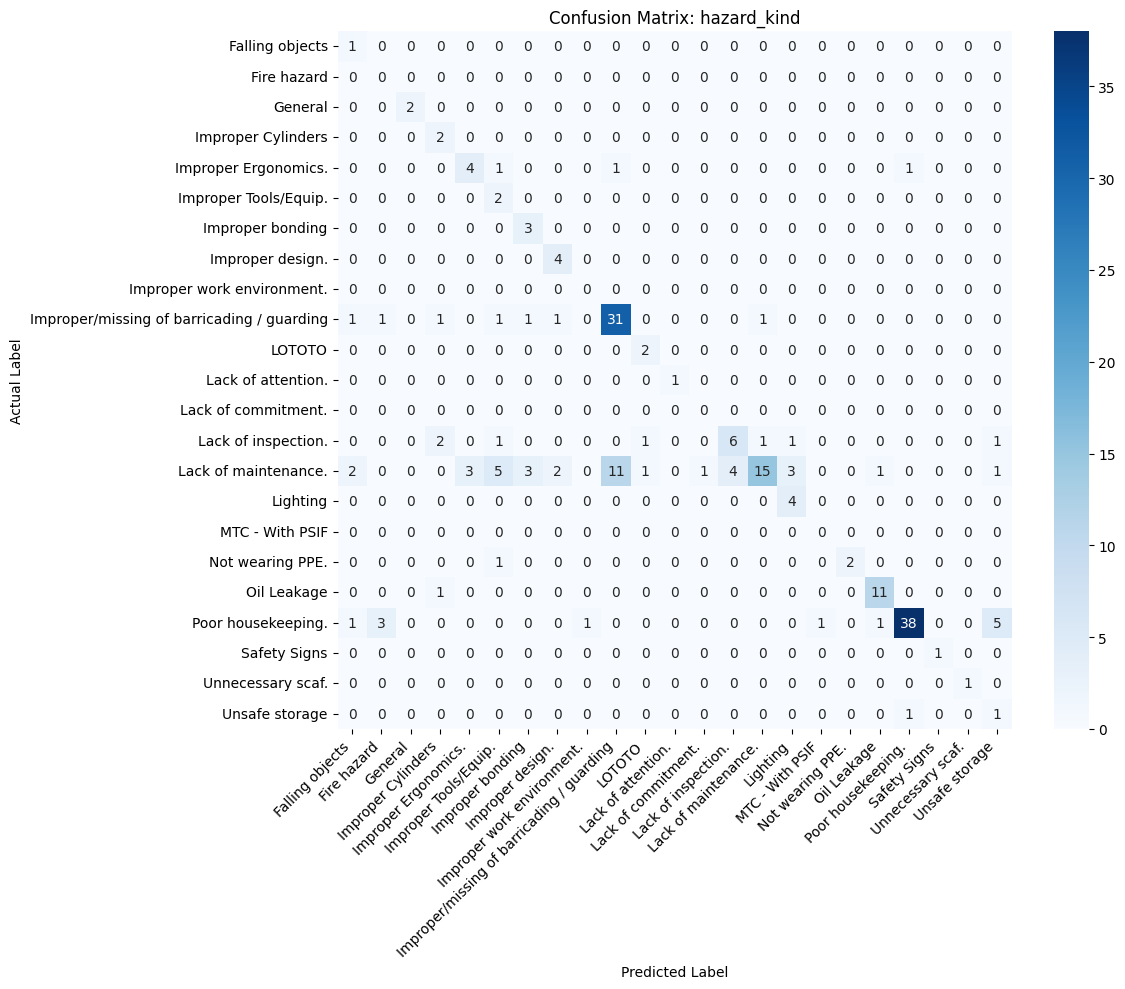

In [26]:
# QUALITY TEST (CONFUSION MATRIX)
import pandas as pd
import numpy as np
import tensorflow as tf
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# --- 1. SETUP ---
TARGET_COL = 'hazard_kind' # The column we want to analyze
LABEL_FILE = 'labels_hazard.json'
VOCAB_SIZE = 10000

def load_json(path):
    with open(path, 'r', encoding='utf-8') as f:
        return json.load(f)

vocab = load_json('vocab.json')
labels = load_json(LABEL_FILE)

# --- 2. LOAD MODEL & DATA ---
interpreter = tf.lite.Interpreter(model_path="safety_classifier_model.tflite")
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Find the specific output index for hazard_kind
hazard_output_index = None
for out in output_details:
    if out['shape'][1] == len(labels):
        hazard_output_index = out['index']
        break

df = pd.read_csv('observations_all_labeled_data.csv').fillna('General')
test_df = df.sample(n=min(200, len(df))) # Use 200 samples for a better matrix

y_true = []
y_pred = []

# --- 3. PREDICTION LOOP ---
print("🧠 Analyzing model confusion...")
for _, row in test_df.iterrows():
    # Preprocess
    observation = f"{row.get('line','')} {row.get('area','')} {row.get('text','')}".lower()
    tokens = [vocab.get(w, 1) for w in observation.split()]
    safe_tokens = [t if t < VOCAB_SIZE else 1 for t in tokens]
    padded = safe_tokens[:120] + [0] * (120 - len(safe_tokens))
    
    # Run TFLite
    interpreter.set_tensor(input_details[0]['index'], np.array([padded], dtype=np.float32))
    interpreter.invoke()
    
    # Get prediction
    output_data = interpreter.get_tensor(hazard_output_index)
    pred_idx = np.argmax(output_data[0])
    
    # Map back to actual label string for better chart readability
    actual_label = str(row[TARGET_COL]).strip()
    pred_label = labels[pred_idx]
    
    y_true.append(actual_label)
    y_pred.append(pred_label)

# --- 4. GENERATE CHART ---
print("📊 Creating Heatmap...")
all_unique_labels = sorted(list(set(y_true) | set(y_pred)))
cm = confusion_matrix(y_true, y_pred, labels=all_unique_labels)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=all_unique_labels, 
            yticklabels=all_unique_labels)
plt.title(f'Confusion Matrix: {TARGET_COL}')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('confusion_matrix_hazard.png')
print("✅ Done! Review 'confusion_matrix_hazard.png' to see model errors.")
plt.show()

In [ ]:
# TESTING CLASSIFIER MODEL
import numpy as np
import tensorflow as tf
import json

# --- SETTINGS (Must match training) ---
MAX_LEN = 120

# 1. LOAD ASSETS
def load_json(path):
    with open(path, 'r', encoding='utf-8') as f:
        return json.load(f)

vocab = load_json('vocab.json')
labels_type = load_json('labels_type.json')
labels_hazard = load_json('labels_hazard.json')
labels_detailed = load_json('labels_detailed_kind.json')
labels_level = load_json('labels_level.json')
labels_action = load_json('labels_action.json')
labels_dept = load_json('labels_dept.json')

# 2. LOAD TFLITE MODEL
interpreter = tf.lite.Interpreter(model_path="safety_classifier_model.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# 3. PREPROCESSING FUNCTION
def preprocess_input(line, area, text):
    # Match the 'inject_context' logic from training
    combined = f"{line.lower().replace('_', ' ')} {area.lower().replace('_', ' ')} {text.lower()}"
    
    # Simple Tokenization using loaded vocab
    tokens = [vocab.get(word, vocab.get('<OOV>')) for word in combined.split()]
    
    # Padding/Truncating
    padded = tokens[:MAX_LEN] + [0] * (MAX_LEN - len(tokens))
    return np.array([padded], dtype=np.float32)

# 4. TESTING FUNCTION
def predict_observation(line, area, text):
    input_data = preprocess_input(line, area, text)
    
    # Run Inference
    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()
    
    # Retrieve all 6 outputs
    # Note: TFLite output order usually matches the Keras model definition order
    results = {}
    label_lists = [labels_type, labels_hazard, labels_detailed, labels_level, labels_action, labels_dept]
    output_names = ['Type', 'Hazard', 'Detailed', 'Level', 'Action', 'Department']

    for i, name in enumerate(output_names):
        output_data = interpreter.get_tensor(output_details[i]['index'])
        prediction_idx = np.argmax(output_data[0])
        results[name] = label_lists[i][prediction_idx]
        results[f"{name}_Confidence"] = float(np.max(output_data[0]))

    return results

# --- RUN A TEST CASE ---
test_line = "Production_Line_1"
test_area = "Packing_Station"
test_text = "Oil spill on the floor near the conveyor belt"

print(f"🔍 Testing Input: {test_text}")
prediction = predict_observation(test_line, test_area, test_text)

for key, value in prediction.items():
    print(f"{key}: {value}")

In [34]:
# BATCH TESTING CLASSIFIER MODEL

import pandas as pd
import numpy as np
import tensorflow as tf
import json
import os

# --- 1. LOAD ASSETS WITH UTF-8 ENCODING ---
def load_json(p):
    # Added encoding='utf-8' to prevent UnicodeDecodeError
    with open(p, 'r', encoding='utf-8') as f: 
        return json.load(f)

print("🧪 Testing TFLite Outputs...")
try:
    vocab = load_json('vocab.json')
    label_map = {
        'out_type': load_json('labels_type.json'),
        'out_hazard': load_json('labels_hazard.json'),
        'out_detailed': load_json('labels_detailed_kind.json'),
        'out_level': load_json('labels_level.json'),
        'out_action': load_json('labels_action.json'),
        'out_dept': load_json('labels_dept.json')
    }
except FileNotFoundError as e:
    print(f"❌ Missing asset file: {e}")
    # Stop execution if files aren't found
    raise 

col_map = {
    'out_type': 'type', 
    'out_hazard': 'hazard_kind', 
    'out_detailed': 'detailed_kind',
    'out_level': 'level', 
    'out_action': 'actionOrCorrectiveAction', 
    'out_dept': 'respDepartment'
}

# --- 2. INITIALIZE INTERPRETER ---
interpreter = tf.lite.Interpreter(model_path="safety_classifier_model.tflite")
interpreter.allocate_tensors()
input_idx = interpreter.get_input_details()[0]['index']
output_details = interpreter.get_output_details()

# --- 3. DATA LOADING ---
df = pd.read_csv('observations_all_labeled_data.csv').fillna('General').sample(min(100, len(df)))
correct = {c: 0 for c in col_map.values()}

# --- 4. EVALUATION LOOP ---
for _, row in df.iterrows():
    # Construct input text
    observation = f"{row['line']} {row['area']} {row['text']}".lower()
    
    # Use index 1 as OOV (Out Of Vocabulary) default
    tokens = [vocab.get(w, 1) for w in observation.split()]
    
    # Clamp tokens and pad to MAX_LEN (120)
    safe_tokens = [t if t < 10000 else 1 for t in tokens]
    padded = (safe_tokens[:120] + [0]*120)[:120]
    
    interpreter.set_tensor(input_idx, np.array([padded], dtype=np.float32))
    interpreter.invoke()
    
    # Check outputs
    for out in output_details:
        for head, col in col_map.items():
            if head in out['name']:
                res = interpreter.get_tensor(out['index'])
                pred_idx = np.argmax(res[0])
                
                # Verify labels exist for the predicted index
                labels = label_map[head]
                if pred_idx < len(labels):
                    pred = str(labels[pred_idx]).strip().lower()
                    actual = str(row[col]).strip().lower()
                    if pred == actual:
                        correct[col] += 1

# --- 5. FINAL REPORT ---
print("\n" + "="*50)
print(f"📊 BATCH TEST ACCURACY ({len(df)} Samples)")
print("="*50)
for k, v in correct.items():
    accuracy = (v / len(df)) * 100
    print(f"{k:25}: {accuracy:6.2f}%")

🧪 Testing TFLite Outputs...


c:\Users\walid\.vscode\titan_management\.venv3.14.0\Lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)



📊 BATCH TEST ACCURACY (100 Samples)
type                     :   0.00%
hazard_kind              :   0.00%
detailed_kind            :   0.00%
level                    :   0.00%
actionOrCorrectiveAction :   0.00%
respDepartment           :   0.00%


In [32]:
# EMBEDDING GENERATION
import pandas as pd
import numpy as np
import tensorflow as tf
import json

# --- 1. SETTINGS & ASSETS ---
INPUT_CSV = 'observations_all_labeled_data.csv'
OUTPUT_CSV = 'observations_with_embeddings.csv'
VOCAB_SIZE = 10000
MAX_LEN = 120

def load_json(p):
    with open(p, 'r', encoding='utf-8') as f:
        return json.load(f)

vocab = load_json('vocab.json')

# --- 2. LOAD EMBEDDING INTERPRETER ---
interpreter = tf.lite.Interpreter(model_path="safety_embedding_model.tflite")
interpreter.allocate_tensors()
input_idx = interpreter.get_input_details()[0]['index']
output_idx = interpreter.get_output_details()[0]['index']

# --- 3. PROCESSING FUNCTION ---
def get_embedding(text):
    # Tokenize & Clamp
    tokens = [vocab.get(w, 1) for w in str(text).lower().split()]
    safe_tokens = [t if t < VOCAB_SIZE else 1 for t in tokens]
    padded = (safe_tokens[:MAX_LEN] + [0]*MAX_LEN)[:MAX_LEN]
    
    # Run Inference
    input_data = np.array([padded], dtype=np.float32)
    interpreter.set_tensor(input_idx, input_data)
    interpreter.invoke()
    
    # Return as list (to store in CSV cell)
    vector = interpreter.get_tensor(output_idx)[0]
    return vector.tolist()

# --- 4. GENERATE & SAVE ---
print("🧠 Generating Embeddings for Database...")
df = pd.read_csv(INPUT_CSV).fillna('General')

# Create the same combined text used during training
df['combined_text'] = df.apply(lambda r: f"{r['line']} {r['area']} {r['text']}".lower(), axis=1)

# Apply the model to every row
df['embedding_vector'] = df['combined_text'].apply(get_embedding)

# Drop the helper column and save
df.drop(columns=['combined_text'], inplace=True)
df.to_csv(OUTPUT_CSV, index=False)

print(f"✅ Success! File saved to {OUTPUT_CSV}")
print(f"Sample Vector (first 5 dims): {df['embedding_vector'].iloc[0][:5]}")

🧠 Generating Embeddings for Database...
✅ Success! File saved to observations_with_embeddings.csv
Sample Vector (first 5 dims): [1.217660665512085, 0.33301568031311035, 0.0, 0.0, 0.0]


In [33]:
# TESTING EMBEDDING (FIND SIMILAR OBSERVATION)  
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import ast

# --- 1. LOAD DATABASE ---
# Assuming 'observations_with_embeddings.csv' was generated in the previous step
df = pd.read_csv('observations_with_embeddings.csv')

text_string = 'خروج دخنة من لودر البنكر الخارجي للكلنكر اثناء التغذية'

# Convert the string representation of lists back into actual numpy arrays
print("🔄 Loading vector database...")
df['embedding_vector'] = df['embedding_vector'].apply(lambda x: np.array(ast.literal_eval(x)))

def find_most_similar(query_vector, top_n=3):
    """
    Compares a new query vector against the entire database.
    """
    # Convert list of arrays into a 2D matrix
    database_matrix = np.stack(df['embedding_vector'].values)
    
    # Reshape query for calculation
    query_vector = np.array(query_vector).reshape(1, -1)
    
    # Calculate Cosine Similarity (Result is between 0 and 1)
    similarities = cosine_similarity(query_vector, database_matrix)[0]
    
    # Get indices of the highest scores
    top_indices = np.argsort(similarities)[::-1][:top_n]
    
    results = []
    for idx in top_indices:
        results.append({
            'score': similarities[idx],
            'text': df.iloc[idx]['text'],
            'hazard': df.iloc[idx]['hazard_kind'],
            'action': df.iloc[idx]['actionOrCorrectiveAction']
        })
    return results

# --- 2. EXAMPLE USAGE ---
# Imagine a user just entered a new observation. 
# We use the 'get_embedding' function from the previous script to get 'new_vector'
# For this example, let's just pick a random vector from the DB to test:
new_vector = df['embedding_vector'].iloc[0] 

matches = find_most_similar(new_vector)

print("\n🔍 Top Similar Past Observations:")
for i, m in enumerate(matches):
    print(f"\nMatch {i+1} (Confidence: {m['score']:.2%})")
    print(f"Text: {m['text']}")
    print(f"Past Hazard: {m['hazard']}")
    print(f"Past Action: {m['action']}")

🔄 Loading vector database...

🔍 Top Similar Past Observations:

Match 1 (Confidence: 100.00%)
Text: labor from global tripped and feels pain in his leg
Past Hazard: FA - Without PSIF
Past Action: He got first aid

Match 2 (Confidence: 94.10%)
Text: NM : production patroller found the side door of limestone crusher opened while the crusher in the running mode and many small rocks escaping outside the crusher ( crusher stopped and isolated ) 
 
 Two hammer crusher broken and grizzly bars broken
Past Hazard: PNM - With PSIF
Past Action: يجب تعديل وضع الباب و تنظيف المكان

Match 3 (Confidence: 93.49%)
Text: جرح سيد عبدالحفيظ براد اثناء العمل بالفومه
Past Hazard: FA - With PSIF
Past Action: تم عمل الاسعاف اللازم له


In [28]:
# UPDATE EMBEDDINGS TO JSON
import json
import numpy as np
import tensorflow as tf

# --- CONFIGURATION ---
MODEL_PATH = 'safety_embedding_model.tflite'
VOCAB_PATH = 'vocab.json'
INPUT_FILE = 'atr.json'
OUTPUT_FILE = 'atr_with_embeddings.json'

# --- LOAD ASSETS ---
def load_assets():
    with open(VOCAB_PATH, 'r', encoding='utf-8') as f:
        vocab = json.load(f)
    
    interpreter = tf.lite.Interpreter(model_path=MODEL_PATH)
    interpreter.allocate_tensors()
    
    return vocab, interpreter

# --- INFERENCE FUNCTION ---
def get_embedding(item, vocab, interpreter):
    # 1. Cleaning logic matching training and Flutter
    line = str(item.get('line', '')).lower().replace('nan', '').replace('_', ' ').strip()
    area = str(item.get('area', '')).lower().replace('nan', '').replace('_', ' ').strip()
    text = str(item.get('observationOrIssueOrHazard', '')).lower().replace('nan', '').strip()
    
    combined = " ".join([p for p in [line, area, text] if p])

    # 2. Tokenize & Clamp (10,000 limit)
    tokens = [vocab.get(w, 1) for w in combined.split()]
    safe_tokens = [t if t < 10000 else 1 for t in tokens]
    padded = safe_tokens[:120] + [0] * (120 - len(safe_tokens))
    
    # 3. TFLite Inference
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    
    input_data = np.array([padded], dtype=np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()
    
    # Returns the 128-dimension list
    return interpreter.get_tensor(output_details[0]['index'])[0].tolist()

# --- MAIN EXECUTION ---
def main():
    print("📂 Loading assets...")
    vocab, interpreter = load_assets()
    
    with open(INPUT_FILE, 'r', encoding='utf-8') as f:
        data = json.load(f)
        
    print(f"🚀 Processing {len(data)} items for 128-dim embeddings...")
    
    for i, item in enumerate(data):
        # We use 'observationOrIssueOrHazard' as the main text source
        if item.get('observationOrIssueOrHazard'):
            item['vector'] = get_embedding(item, vocab, interpreter)
        else:
            item['vector'] = [0.0] * 128 # Fallback for empty rows
            
        if i % 1000 == 0:
            print(f"✅ Processed {i} items...")

    print(f"💾 Saving to {OUTPUT_FILE}...")
    with open(OUTPUT_FILE, 'w', encoding='utf-8') as f:
        json.dump(data, f, ensure_ascii=False)
    
    print("✨ Done! Use the new file in your Flutter assets.")

if __name__ == "__main__":
    main()

📂 Loading assets...


c:\Users\walid\.vscode\titan_management\.venv3.14.0\Lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


🚀 Processing 16352 items for 128-dim embeddings...
✅ Processed 0 items...
✅ Processed 1000 items...
✅ Processed 2000 items...
✅ Processed 3000 items...
✅ Processed 4000 items...
✅ Processed 5000 items...
✅ Processed 6000 items...
✅ Processed 7000 items...
✅ Processed 8000 items...
✅ Processed 9000 items...
✅ Processed 10000 items...
✅ Processed 11000 items...
✅ Processed 12000 items...
✅ Processed 13000 items...
✅ Processed 14000 items...
✅ Processed 15000 items...
✅ Processed 16000 items...
💾 Saving to atr_with_embeddings.json...
✨ Done! Use the new file in your Flutter assets.


In [ ]:
# UPLOAD EMBEDDINGS TO FIREBASE

import firebase_admin
from firebase_admin import credentials, db
import json
import os
import re

# --- 1. CONFIGURATION ---
SERVICE_ACCOUNT_FILE = 'serviceAccountKey.json'
DATABASE_URL = "https://database-a1f2a-default-rtdb.firebaseio.com/"
DATA_FILE = 'recent_reports_with_vectors.json'

def normalize_text(text):
    """
    Enhanced normalization for both Arabic and English:
    1. Lowercase
    2. Standardize Arabic Alef (إ أ آ -> ا)
    3. Standardize Arabic Teh Marbuta (ة -> ه)
    4. Standardize Arabic Yeh (ى -> ي)
    5. Remove all non-alphanumeric characters (including punctuation/spaces)
    """
    if not isinstance(text, str):
        return ""
    
    # Convert to lowercase
    text = text.lower()
    
    # Arabic Normalization
    text = re.sub(r'[إأآ]', 'ا', text)
    text = re.sub(r'ة', 'ه', text)
    text = re.sub(r'ى', 'ي', text)
    
    # Remove all non-alphanumeric characters (supports Arabic and English characters)
    # \w includes Arabic letters in modern regex, but we ensure it covers the range
    text = re.sub(r'[^\w\u0600-\u06FF]', '', text)
    
    return text

def update_existing_reports():
    if not os.path.exists(SERVICE_ACCOUNT_FILE) or not os.path.exists(DATA_FILE):
        print("Error: Missing serviceAccountKey.json or recent_reports_with_vectors.json")
        return

    # Initialize Firebase
    if not firebase_admin._apps:
        print("Connecting to Firebase...")
        cred = credentials.Certificate(SERVICE_ACCOUNT_FILE)
        firebase_admin.initialize_app(cred, {'databaseURL': DATABASE_URL})

    # Load the local reports (the ones with vectors)
    with open(DATA_FILE, 'r', encoding='utf-8') as f:
        vector_data = json.load(f)

    # Reference to 'atr'
    ref = db.reference('atr')
    
    print("Fetching existing reports from Firebase...")
    existing_data = ref.get()
    
    if not existing_data:
        print("Database is empty.")
        return

    # Handle List vs Dict result from Firebase
    if isinstance(existing_data, list):
        existing_items = {str(i): v for i, v in enumerate(existing_data) if v is not None}
    else:
        existing_items = existing_data

    # Map Normalized Text -> Database Keys
    print("Building normalization index...")
    firebase_map = {}
    for key, val in existing_items.items():
        if val and 'observationOrIssueOrHazard' in val:
            norm = normalize_text(val['observationOrIssueOrHazard'])
            if norm:
                firebase_map[norm] = key

    updated_count = 0
    not_found_list = []
    total_local = len(vector_data)

    print(f"Matching {total_local} local records against {len(firebase_map)} unique DB records...")

    for local_report in vector_data:
        raw_text = local_report.get('observationOrIssueOrHazard', '')
        local_norm = normalize_text(raw_text)
        local_vector = local_report.get('vector')
        
        if not local_norm:
            continue

        found_key = firebase_map.get(local_norm)
        
        if found_key:
            ref.child(found_key).update({'vector': local_vector})
            updated_count += 1
        else:
            # Store details for records that didn't match
            not_found_list.append({
                "text": raw_text,
                "norm": local_norm
            })

    # --- SUMMARY ---
    print("\n" + "="*40)
    print("       UPLOAD/UPDATE SUMMARY")
    print("="*40)
    print(f"Total processed:      {total_local}")
    print(f"Updated in DB:        {updated_count}")
    print(f"Unmatched:            {len(not_found_list)}")
    print("="*40)

    if not_found_list:
        # Save unmatched reports to a JSON so you can see the "norm" it generated
        with open('unmatched_diagnostics.json', 'w', encoding='utf-8') as f:
            json.dump(not_found_list, f, ensure_ascii=False, indent=2)
        print(f"\nSaved unmatched diagnostics to 'unmatched_diagnostics.json'")
        print("Check this file to see why the normalization isn't finding matches.")

if __name__ == "__main__":
    update_existing_reports()

Fetching existing reports from Firebase...
Building normalization index...
Matching 2293 local records against 14705 unique DB records...

       UPLOAD/UPDATE SUMMARY
Total processed:      2293
Updated in DB:        2293
Unmatched:            0


# FORECASTER

In [ ]:
# TRAIN FORECASTER MODEL
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model
from sklearn.model_selection import TimeSeriesSplit
import json

# --- 1. DATA PREP ---
print("📂 Loading Data...")

df = pd.read_csv('observations_all_labeled_data.csv')
tscv = TimeSeriesSplit(n_splits=5)
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)
# Ensure we have a date. If 'issueDate' is missing, we use index.
if 'issueDate' in df.columns:
    df['date'] = pd.to_datetime(df['issueDate'], errors='coerce')
else:
    # Fallback if no date column
    print("⚠️ No issueDate found, simulating dates...")
    df['date'] = pd.date_range(start='1/1/2024', periods=len(df), freq='H')

# Sort
df = df.sort_values('date').dropna(subset=['date'])

# Group: Rows = Weeks, Columns = Areas, Values = Count of Incidents
# This creates a matrix of "How many accidents per area per week"
pivot_df = df.groupby([pd.Grouper(key='date', freq='W'), 'area']).size().unstack(fill_value=0)
areas = list(pivot_df.columns)
data_matrix = pivot_df.values.astype(np.float32)

print(f"📊 Found {len(areas)} Areas: {areas}")
print(f"📉 Matrix Shape: {data_matrix.shape} (Weeks x Areas)")

# --- 2. CREATE WINDOWS ---
# Input: Last 4 Weeks (Window) -> Output: Next Week (Target)
WINDOW_SIZE = 4
X, y = [], []

for i in range(len(data_matrix) - WINDOW_SIZE):
    X.append(data_matrix[i : i+WINDOW_SIZE]) # The history
    y.append(data_matrix[i+WINDOW_SIZE])     # The future

X = np.array(X) # Shape: (Samples, 4, Num_Areas)
y = np.array(y) # Shape: (Samples, Num_Areas)

# --- 3. BUILD "SAFE" MODEL (Dense/Flatten) ---
# We flatten the 4 weeks history into one long vector and feed it to a Dense layer.
# This mimics "Time Series" logic without the complex LSTM ops.
inputs = layers.Input(shape=(WINDOW_SIZE, len(areas))) 
x = layers.Flatten()(inputs) 
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
outputs = layers.Dense(len(areas))(x) # Predict count for each area

model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='mse')

# --- 4. TRAIN ---
print("🚀 Training Forecaster...")
model.fit(X, y, epochs=100, batch_size=2, verbose=0)

# --- 5. EXPORT ---
# This generates a standard TFLite model compatible with EVERYTHING
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('safety_forecaster.tflite', 'wb') as f:
    f.write(tflite_model)

# Save the Area Names so Flutter knows which index is which
with open('area_map.json', 'w') as f:
    json.dump(areas, f)

print("✅ DONE! Generated 'safety_forecaster.tflite' and 'area_map.json'")

C:\Users\walid\AppData\Local\Temp\ipykernel_18156\4200961317.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['issueDate'], errors='coerce')


🚀 Training Web-Safe Forecaster for Testing...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
✅ Test Complete. Mean Absolute Error: 9.8085
INFO:tensorflow:Assets written to: C:\Users\walid\AppData\Local\Temp\tmpfim7bsg3\assets


INFO:tensorflow:Assets written to: C:\Users\walid\AppData\Local\Temp\tmpfim7bsg3\assets


Saved artifact at 'C:\Users\walid\AppData\Local\Temp\tmpfim7bsg3'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 4, 56), dtype=tf.float32, name='keras_tensor_52')
Output Type:
  TensorSpec(shape=(None, 56), dtype=tf.float32, name=None)
Captures:
  2870401610768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2870401605968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2870401604432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2870401603472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2870401604048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2870401605008: TensorSpec(shape=(), dtype=tf.resource, name=None)
✅ Generated 'safety_forecaster_model.tflite' (Size: 21.07 KB)
✅ Validated: Uses only TFLITE_BUILTINS.
✅ Charts generated: 'web_model_test_total.png' and 'web_model_test_areas.png'


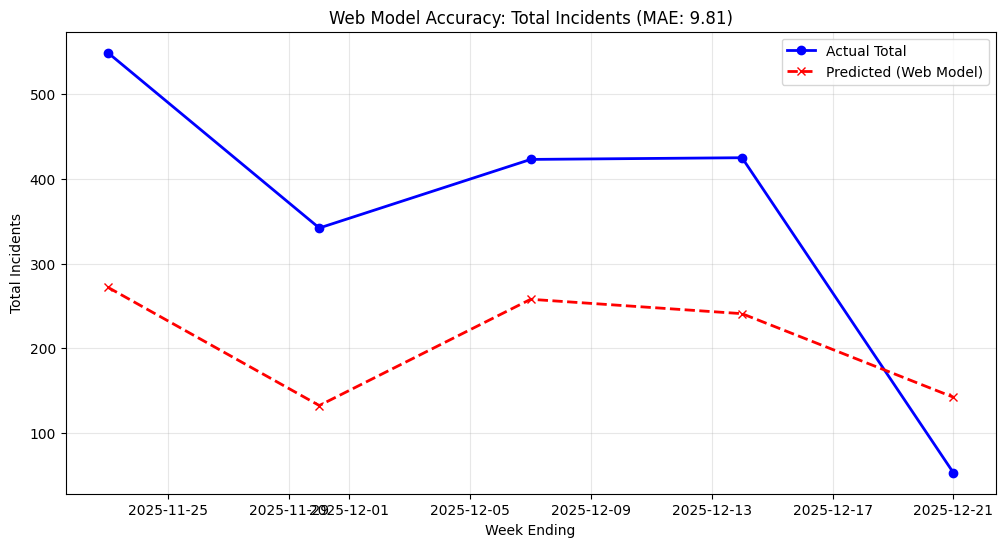

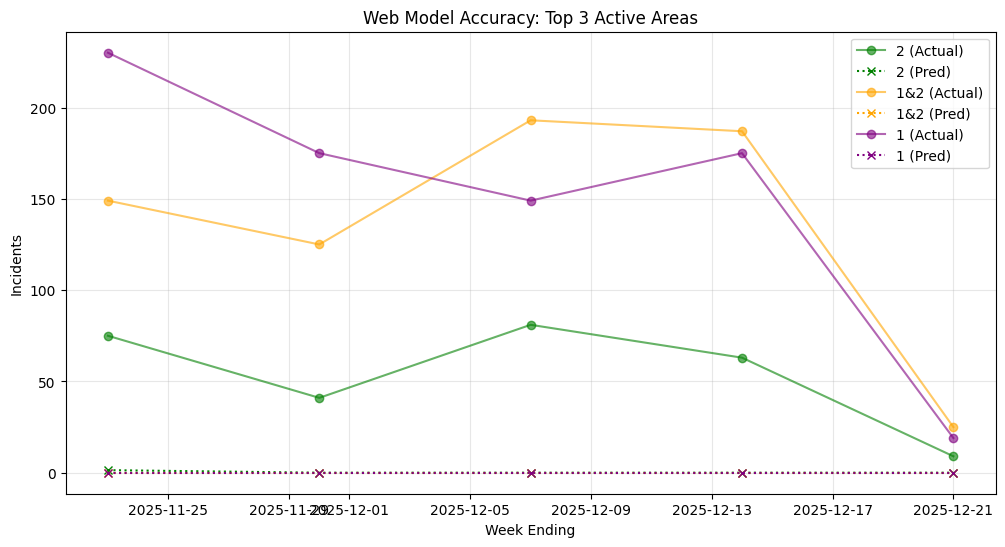

: 

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import json

# --- 1. Load Data ---
df = pd.read_csv('observations_all_labeled_data.csv')
if 'issueDate' in df.columns:
    df['date'] = pd.to_datetime(df['issueDate'], errors='coerce')
else:
    df['date'] = pd.date_range(start='1/1/2025', periods=len(df), freq='H')

df = df.sort_values('date').dropna(subset=['date', 'area'])

# Grouping
pivot_df = df.groupby([pd.Grouper(key='date', freq='W'), 'area']).size().unstack(fill_value=0)
areas = list(pivot_df.columns)
data_matrix = pivot_df.values.astype(np.float32)

# --- 2. Scaling ---
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_matrix)

# --- 3. Windows ---
WINDOW_SIZE = 4
X, y = [], []
for i in range(len(scaled_data) - WINDOW_SIZE):
    X.append(scaled_data[i : i+WINDOW_SIZE])
    y.append(scaled_data[i+WINDOW_SIZE])

X = np.array(X)
y = np.array(y)

# Train/Test Split (Last 5 weeks for testing)
split_idx = len(X) - 5
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]
test_dates = pivot_df.index[-5:]

# --- 4. Re-Build Web-Compatible Model (Conv1D) ---
# Identical architecture to the previous step
inputs = layers.Input(shape=(WINDOW_SIZE, len(areas)))
x = layers.Conv1D(filters=32, kernel_size=2, activation='relu', padding='same')(inputs)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(len(areas), activation='relu')(x)

model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='mae')

# --- 5. Train ---
print("🚀 Training Web-Safe Forecaster for Testing...")
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=4, verbose=0)

# --- 6. Predict & Evaluate ---
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_actual = scaler.inverse_transform(y_test)

# Calculate Error
mae = np.abs(y_actual - y_pred).mean()
print(f"✅ Test Complete. Mean Absolute Error: {mae:.4f}")

# --- 7. Export with Strict TFLITE_BUILTINS ---
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# STRICTLY enforce TFLite Builtins
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS]
# Optional: Optimize for size for web
converter.optimizations = [tf.lite.Optimize.DEFAULT]

tflite_model = converter.convert()

# Save Model
model_filename = 'safety_forecaster_model.tflite'
with open(model_filename, 'wb') as f:
    f.write(tflite_model)

# Save Metadata (Scaling params + Area Names)
metadata = {
    'min': scaler.min_.tolist(),
    'scale': scaler.scale_.tolist(),
    'areas': areas,
    'input_shape': [1, WINDOW_SIZE, len(areas)]
}
with open('safety_forecaster_metadata.json', 'w') as f:
    json.dump(metadata, f)

print(f"✅ Generated '{model_filename}' (Size: {len(tflite_model)/1024:.2f} KB)")
print("✅ Validated: Uses only TFLITE_BUILTINS.")

# --- 8. Plotting ---

# Plot 1: Total Incidents
plt.figure(figsize=(12, 6))
plt.plot(test_dates, y_actual.sum(axis=1), marker='o', label='Actual Total', color='blue', linewidth=2)
plt.plot(test_dates, y_pred.sum(axis=1), marker='x', label='Predicted (Web Model)', linestyle='--', color='red', linewidth=2)
plt.title(f'Web Model Accuracy: Total Incidents (MAE: {mae:.2f})')
plt.xlabel('Week Ending')
plt.ylabel('Total Incidents')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('web_model_test_total.png')

# Plot 2: Specific High-Risk Areas
# Identify top 3 areas in the test set
top_indices = np.argsort(y_actual.sum(axis=0))[-3:]
plt.figure(figsize=(12, 6))
colors = ['green', 'orange', 'purple']

for i, idx in enumerate(top_indices):
    area_name = areas[idx]
    plt.plot(test_dates, y_actual[:, idx], marker='o', label=f'{area_name} (Actual)', color=colors[i], alpha=0.6)
    plt.plot(test_dates, y_pred[:, idx], marker='x', linestyle=':', label=f'{area_name} (Pred)', color=colors[i])

plt.title('Web Model Accuracy: Top 3 Active Areas')
plt.xlabel('Week Ending')
plt.ylabel('Incidents')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('web_model_test_areas.png')

print("✅ Charts generated: 'web_model_test_total.png' and 'web_model_test_areas.png'")

#Photo classifier
You need a dataset of images labeled with bounding boxes (e.g., using a tool like LabelImg).

Install the library: pip install tflite-model-maker.

Run python train_object_detector.py.

It will generate hazard_detector.tflite.

Place this in assets/ai/

In [ ]:
import os
import tensorflow as tf
from mediapipe_model_maker import object_detector

# --- CONFIGURATION ---
# Path to your dataset containing images and XML annotations (Pascal VOC format)
# Structure:
# data/
#   img1.jpg, img1.xml
#   img2.jpg, img2.xml
DATA_PATH = "safety_dataset"
EXPORT_DIR = "exported_model"
MODEL_NAME = "hazard_detector.tflite"

# Define your classes
# These must match the <name> tags inside your XML files exactly.
LABELS = ['Helmet', 'No_Helmet', 'Vest', 'Fire', 'Trip_Hazard']

def train():
    print(f"🚀 Starting MediaPipe Model Maker Training...")

    # 1. Load the dataset
    # MediaPipe looks for XML files alongside images automatically.
    print(f"📂 Loading dataset from {DATA_PATH}...")
    data = object_detector.Dataset.from_pascal_voc_folder(DATA_PATH)

    # 2. Split data: 80% train, 10% validation, 10% test
    train_data, rest_data = data.split(0.8)
    validation_data, test_data = rest_data.split(0.5)

    # 3. Choose Model Architecture
    # EfficientDet-Lite0 is the best balance of speed and accuracy for Web/Mobile.
    spec = object_detector.SupportedModels.MOBILENET_V2_I320 # High speed
    # Or use EfficientDet:
    # spec = object_detector.SupportedModels.EFFICIENTDET_LITE0 

    hparams = object_detector.HParams(
        export_dir=EXPORT_DIR,
        epochs=50,
        batch_size=8,
        learning_rate=0.3,
        cosine_decay_epochs=50,
        cosine_decay_alpha=0.1
    )

    options = object_detector.ObjectDetectorOptions(
        supported_model=spec,
        hparams=hparams
    )

    # 4. Train the model
    print("🧠 Training in progress...")
    model = object_detector.ObjectDetector.create(
        train_data=train_data,
        validation_data=validation_data,
        options=options
    )

    # 5. Evaluate
    print("📊 Evaluating on test data...")
    loss, coco_metrics = model.evaluate(test_data, batch_size=8)
    print(f"Test COCO metrics: {coco_metrics}")

    # 6. Export as TFLite
    print(f"💾 Exporting model to {EXPORT_DIR}/{MODEL_NAME}...")
    model.export_model(MODEL_NAME)
    
    # MediaPipe also creates a labels.txt inside the export dir
    print(f"✅ Success! Generated model and labels in '{EXPORT_DIR}'")

if __name__ == "__main__":
    train()

*USING YOLO*

Key points for your YOLO setup:

Data Format: Unlike Pascal VOC (XML), YOLO expects .txt files where each line is class_id center_x center_y width height (all values normalized 0 to 1). If you still have XMLs, you can use a simple script or tools like Roboflow to convert them to YOLO format.

Export: When you run model.export(format="tflite"), it creates a folder (usually under runs/detect/train/weights/). Inside, you will find safety_model_float32.tflite.

Labels: The labels are usually baked into the metadata, but you can also find them in the data.yaml we created.

In [ ]:
import os
import requests
import zipfile

# This script downloads a small sample PPE dataset so you can test your YOLO training script
DATASET_URL = "https://github.com/ultralytics/yolov5/releases/download/v1.0/coco128.zip" # Standard sample
DEST_FOLDER = r"C:\Users\walid\.vscode\titan_management\ai\kindOfHazardClassifier\safety_dataset\raw"

def download_and_extract():
    if not os.path.exists(DEST_FOLDER):
        os.makedirs(DEST_FOLDER)
    
    print("Downloading sample dataset (COCO128)...")
    r = requests.get(DATASET_URL, stream=True)
    zip_path = "sample.zip"
    
    with open(zip_path, 'wb') as f:
        for chunk in r.iter_content(chunk_size=1024):
            if chunk:
                f.write(chunk)
    
    print("Extracting files...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(".")
    
    # Rename to match our safety project structure
    if os.path.exists("coco128"):
        os.rename("coco128", DEST_FOLDER)
        
    os.remove(zip_path)
    print(f"✅ Ready! You now have images in {DEST_FOLDER}. You can now run train_yolo.py.")

if __name__ == "__main__":
    download_and_extract()

In [ ]:
# PREREQUISITE:
# pip install ultralytics

from ultralytics import YOLO
import os

# --- CONFIGURATION ---
# YOLOv8 requires a dataset.yaml file. 
# Your folder structure should look like this:
# /safety_data
#   /images
#      train/img1.jpg
#      val/img2.jpg
#   /labels
#      train/img1.txt (Class_ID Center_X Center_Y Width Height)
#      val/img2.txt
DATA_YAML = "safety_data.yaml"
EXPORT_NAME = "safety_hazard_detector.tflite"

def train_and_export():
    print("🚀 Starting YOLOv8 Training...")

    # 1. Load a pre-trained Nano model (the lightest version)
    # This is perfect for Web/Mobile because it's fast and small.
    model = YOLO("yolov8n.pt") 

    # 2. Train the model
    # data: path to your .yaml file
    # epochs: how many times to see the data (30-100 is usually good)
    # imgsz: 640 is standard, but you can use 320 for even more speed on web
    print("🧠 Training in progress...")
    model.train(
        data=DATA_YAML, 
        epochs=50, 
        imgsz=640, 
        batch=16, 
        name="safety_model"
    )

    # 3. Export to TFLite
    # 'int8=True' or 'half=True' can be used for quantization to make it smaller.
    # For Web, a standard float32 or float16 export is usually safest for compatibility.
    print(f"💾 Exporting to TFLite format...")
    path = model.export(format="tflite", imgsz=640)
    
    print(f"✅ Success! Your TFLite model is located at: {path}")
    print("👉 Move the generated .tflite file to your Flutter assets/ai/ folder.")

if __name__ == "__main__":
    # Create a dummy safety_data.yaml if it doesn't exist to show you the format
    if not os.path.exists(DATA_YAML):
        with open(DATA_YAML, 'w') as f:
            f.write(f"""
path: ./safety_data # dataset root dir
train: images/train
val: images/val

# Classes
names:
  0: Helmet
  1: No_Helmet
  2: Vest
  3: Fire
  4: Trip_Hazard
            """)
        print(f"📝 Created a template {DATA_YAML}. Please update paths and labels.")
    
    train_and_export()

Final Steps to Deploy:
* Run the script: python download_tflite.py to create the web/tflite/ directory.

* Build your app: flutter build web --web-renderer canvaskit.

* Check firebase.json: Ensure your COOP/COEP headers are still there (they are mandatory for WASM multi-threading).

* Deploy: firebase deploy.

Serving these files from your own domain removes the "Third-Party" restriction and allows the AI to initialize instantly when the page loads.

In [1]:
# flutter upload to web 

import os
import urllib.request

# Configuration: Using a stable version of TFLite Web JS/WASM
BASE_URL = "https://cdn.jsdelivr.net/gh/hoomanmmd/tflite-js@v0.0.1-alpha.10/"
TARGET_DIR = os.path.join("web", "tflite")
FILES = [
    "tf-core.js",
    "tf-backend-cpu.js",
    "tf-tflite.min.js",
    "tflite_web_api_cc_simd.js",
    "tflite_web_api_cc_simd.wasm"
]

def download_files():
    # 1. Create directory structure
    if not os.path.exists(TARGET_DIR):
        print(f"Creating directory: {TARGET_DIR}")
        os.makedirs(TARGET_DIR)

    print("🚀 Starting download of TFLite web assets...")
    
    for file_name in FILES:
        url = BASE_URL + file_name
        output_path = os.path.join(TARGET_DIR, file_name)
        
        print(f"Downloading {file_name}...")
        try:
            # Add a user-agent to prevent blocks from some CDNs
            req = urllib.request.Request(url, headers={'User-Agent': 'Mozilla/5.0'})
            with urllib.request.urlopen(req) as response, open(output_path, 'wb') as out_file:
                out_file.write(response.read())
            print(f"✅ Saved to {output_path}")
        except Exception as e:
            print(f"❌ Failed to download {file_name}: {e}")

    print("\n🎉 Download complete!")
    print(f"Next Steps:")
    print(f"1. Ensure your 'web/index.html' includes the scripts from {TARGET_DIR}.")
    print(f"2. Deploy your app to Firebase Hosting.")

if __name__ == "__main__":
    download_files()

Creating directory: web\tflite
🚀 Starting download of TFLite web assets...
✅ Saved to web\tflite\tf-core.js
✅ Saved to web\tflite\tf-backend-cpu.js
✅ Saved to web\tflite\tf-tflite.min.js
✅ Saved to web\tflite\tflite_web_api_cc_simd.js
✅ Saved to web\tflite\tflite_web_api_cc_simd.wasm

🎉 Download complete!
Next Steps:
1. Ensure your 'web/index.html' includes the scripts from web\tflite.
2. Deploy your app to Firebase Hosting.
